<div class='alert alert-success'>
    <h1 align="center">Local Search Algorithms: Simulated Annealing for N-Queens</h1> 
    <h3 align="center">Artificial Intelligece Course (Fall 2021)</h3>
    <h5 align="center">Seyed Naser RAZAVI <a href='http://www.snrazavi.ir/ai-slides/'>(website)</a></h5>
</div>

In [1]:
import sys
import time
import math
import random
import matplotlib.pyplot as plt

import ipywidgets as widgets
from IPython.display import clear_output

from utils import timed
from nqueens import NQueensState, NQueensStatePermutation

plt.rcParams['figure.figsize'] = (6, 6)

## N-Queens Problem
- **Goal**: Place N queens on a N-by-N chess board so that no two queens can attack each other.
- Thus a solution requires that no two queens share the same row, column or diagonal.

<p align="center">
    <img src="imgs/Four-Queens-Local-Search.png" width="80%">
</p>
<h6 align="center">4-Queens problem</h6>

### Problem formulation: First formulation
- **States**: each column contains only one queen.
- **Actions**: move a queen to another row in its column.
- **State Space Size**: $N^N$


### Problem formulation: Second formulation (Permuatation)
- **States**: each column and each row contains only one queen.
- **Actions**: move a queen to another row in its column which is not occupied.
- **State Space Size**: $N!$

In [2]:
state = NQueensState.random_state(N=8)
print(state)

[7, 3, 4, 6, 6, 7, 7, 8] <11>


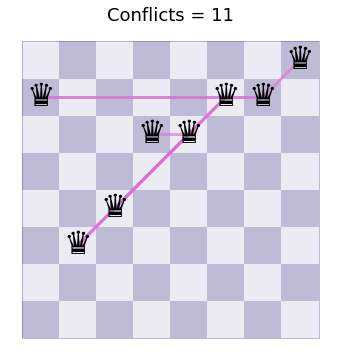

In [3]:
state.plot(show_conflicts=True)

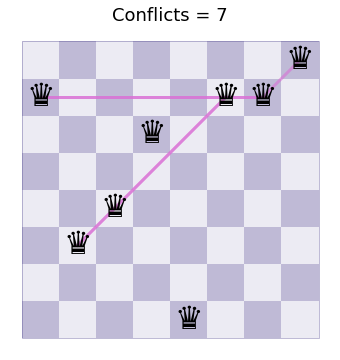

In [4]:
best_neighbor = state.best_neighbor()
best_neighbor.plot(show_conflicts=True)

In [5]:
best_neighbor

NQueensState(queens=[7, 3, 4, 6, 1, 7, 7, 8])

## Simulated Annealing
<img src="imgs/simulated_annealing.png" width="80%">

In [6]:
class SimulatedAnnealing:
    def __init__(self):
        self.history = []
        self.T = None
    
    def search(self, state, T0=10, alpha=0.99, tol=1e-8, verbose=0):
        self.T = T0
        current = state

        while True:

            clear_output(wait=True)
            if verbose == 0: print(f'T = {self.T:.8f}, Conflicts = {current.conflicts():d}')
            elif verbose == 1: print(current)
            elif verbose == 2: current.plot(show_conflicts=False)
            elif verbose == 3: current.plot(show_conflicts=True)
            
            self.history.append(current)

            if self.T < tol or current.conflicts() == 0:
                return current

            neighbor = current.random_neighbor()
            delta_E = current.conflicts() - neighbor.conflicts()
            if delta_E >= 0: 
                current = neighbor
            elif random.random() < math.exp(delta_E / self.T):
                current = neighbor

            self.T = alpha * self.T

        return current
    
    def __call__(self, state, T0=10, alpha=0.99, tol=1e-8, verbose=0):
        return self.search(state, T0, alpha, tol, verbose)
    

    def plot_history(self):
        plt.figure(figsize=(12, 4))

        conflicts = [state.conflicts() for state in self.history]
        plt.plot(range(len(conflicts)), conflicts)
        plt.xlabel('Iteration')
        plt.ylabel('Conflicts')
        plt.show()

In [7]:
initial_state = NQueensState.random_state(200)

sa = SimulatedAnnealing()
t, solution = timed(sa, state=initial_state, T0=10, alpha=.999, verbose=0)
print(f'\n\n<Solution with {solution.conflicts()} conflicts found in {t:.2f} secs.>\n {solution}')

T = 0.00000001, Conflicts = 11


<Solution with 11 conflicts found in 95.93 secs.>
 [40, 43, 133, 23, 86, 176, 21, 56, 118, 53, 131, 92, 115, 127, 32, 171, 15, 80, 143, 4, 61, 3, 90, 51, 126, 141, 100, 7, 174, 156, 184, 87, 89, 195, 2, 198, 174, 74, 33, 154, 52, 50, 146, 200, 121, 42, 71, 81, 36, 85, 82, 193, 73, 120, 151, 125, 11, 130, 75, 142, 10, 161, 76, 149, 144, 66, 112, 199, 54, 181, 192, 197, 183, 123, 117, 136, 20, 106, 24, 26, 8, 139, 148, 59, 169, 14, 28, 17, 41, 188, 84, 101, 90, 13, 30, 58, 27, 72, 57, 189, 147, 12, 62, 46, 135, 190, 166, 68, 196, 28, 186, 162, 119, 132, 83, 179, 93, 170, 145, 25, 185, 192, 109, 129, 105, 160, 31, 157, 182, 55, 70, 39, 45, 178, 18, 114, 191, 22, 96, 163, 102, 97, 158, 94, 35, 44, 60, 16, 122, 5, 1, 67, 47, 5, 177, 168, 48, 91, 99, 124, 64, 187, 65, 88, 103, 6, 155, 9, 172, 29, 49, 69, 150, 34, 138, 19, 159, 149, 78, 111, 113, 173, 79, 95, 52, 38, 153, 180, 37, 194, 107, 128, 116, 164, 167, 104, 36, 77, 108, 134] <11>


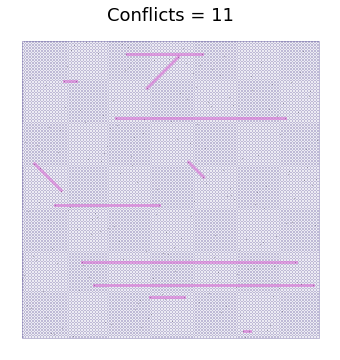

In [8]:
solution.plot(show_conflicts=True)

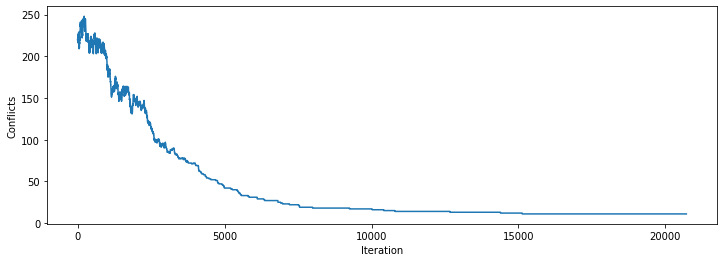

In [9]:
sa.plot_history()

In [10]:
def update_plot(i, show_conflicts):
    width, height = 512, 512
    fc='darkslateblue'
    
    state = sa.history[i - 1]
    N = state.N
    w, h = width // N, height // N

    # draw chess board
    for i in range(N):
        for j in range(N):
            alpha = 0.35 if (i + j) % 2 == 0 else 0.1
            cell = plt.Rectangle((i * w, j * h), w, h, fc=fc, alpha=alpha)
            plt.gca().add_patch(cell)
            
    border = plt.Rectangle((0, 0), N * w, N * h, ec=fc, fc='w', alpha=0.35)
    plt.gca().add_patch(border)

    # show conflicts
    if show_conflicts:
        for i in range(N - 1):
            row_i = state.queens[i]
            for j in range(i + 1, N):
                row_j = state.queens[j]
                if row_i == row_j or abs(row_i - row_j) == j - i:
                    x1, x2 = i * w + w // 2, j * w + w // 2
                    y1, y2 = (row_i - 1) * h + h // 2, (row_j - 1) * h + h // 2
                    line = plt.Line2D((x1, x2), (y1, y2), lw=3, ls='-', color='orchid', alpha=0.6)
                    plt.gca().add_line(line)

    # place queens on chess board
    for col, row in enumerate(state.queens):
        c = 'k' if (col + row) % 2 == 0 else 'w'
        x = col * w + w // 2
        y = (row - 1) * h + h // 2
        fs = w // 2.5
        plt.text(x, y, '♛', color='k', fontsize=fs, ha='center', va='center')

    plt.axis('square')
    plt.axis('off')
    plt.xticks(())
    plt.yticks(())
    plt.title("Conflicts = {}".format(state.conflicts()), fontsize=18)
    plt.show()

In [11]:
i = widgets.IntSlider(value=1, min=1, max=len(sa.history), description='i:')
show_conflicts = widgets.Checkbox(value=True, description='Show conflicts')

widgets.interact(update_plot, i=i, show_conflicts=show_conflicts);

interactive(children=(IntSlider(value=1, description='i:', max=20714, min=1), Checkbox(value=True, description…

## Permutation

In [12]:
initial_state = NQueensStatePermutation.random_state(200)

sa = SimulatedAnnealing()
t, solution = timed(sa, state=initial_state, T0=10, alpha=.999, verbose=0)
print(f'\n\n<Solution with {solution.conflicts()} conflicts found in {t:.2f} secs.>\n {solution}')

T = 0.00000001, Conflicts = 2


<Solution with 2 conflicts found in 60.95 secs.>
 [163, 82, 59, 153, 39, 145, 155, 138, 179, 20, 5, 60, 110, 88, 133, 151, 154, 56, 26, 158, 57, 65, 99, 112, 69, 170, 68, 61, 156, 196, 90, 33, 8, 106, 97, 141, 122, 198, 200, 80, 25, 54, 189, 32, 185, 124, 66, 83, 131, 64, 12, 89, 174, 166, 197, 81, 132, 47, 188, 28, 148, 6, 121, 186, 91, 16, 136, 3, 29, 165, 37, 44, 137, 27, 143, 71, 116, 108, 103, 50, 183, 86, 146, 9, 199, 139, 85, 192, 98, 150, 107, 41, 11, 175, 178, 161, 164, 36, 169, 190, 104, 191, 42, 115, 162, 51, 4, 7, 52, 135, 195, 144, 94, 87, 43, 74, 21, 147, 35, 117, 92, 70, 125, 176, 58, 48, 84, 182, 13, 19, 123, 34, 118, 157, 38, 55, 79, 62, 30, 168, 53, 2, 95, 127, 187, 177, 140, 31, 113, 128, 14, 23, 171, 22, 160, 130, 67, 75, 40, 173, 181, 184, 119, 17, 76, 172, 194, 159, 149, 93, 72, 102, 49, 129, 101, 105, 111, 193, 142, 15, 96, 46, 77, 180, 73, 45, 114, 18, 109, 63, 24, 78, 152, 126, 100, 1, 134, 10, 120, 167] <2>


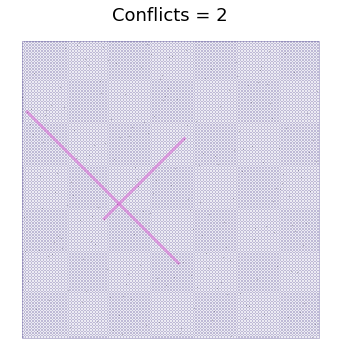

In [13]:
solution.plot(show_conflicts=True)

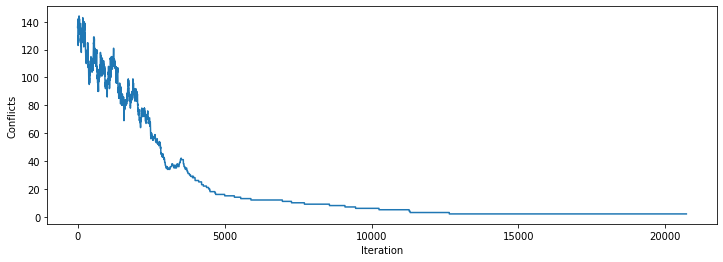

In [14]:
sa.plot_history()

In [15]:
i = widgets.IntSlider(value=1, min=1, max=len(sa.history), description='i:')
show_conflicts = widgets.Checkbox(value=True, description='Show conflicts')

widgets.interact(update_plot, i=i, show_conflicts=show_conflicts);

interactive(children=(IntSlider(value=1, description='i:', max=20714, min=1), Checkbox(value=True, description…

## Animation

In [52]:
N = 10
initial_state = NQueensState.random_state(N)

sa = SimulatedAnnealing()
t, solution = timed(sa, state=initial_state, T0=10, alpha=.98, verbose=0)
print(f'\n\n<Solution with {solution.conflicts()} conflicts found in {t:.2f} secs.>\n {solution}')

T = 0.00000075, Conflicts = 0


<Solution with 0 conflicts found in 0.52 secs.>
 [7, 4, 1, 8, 6, 3, 10, 2, 9, 5] <0>


In [53]:
len(sa.history)

813

In [63]:
# remove states that are equal to their previous state in the history
def summarize_history(history):
    reduced = [history[0]]
    for i in range(1, len(history)):
        if history[i].queens != reduced[-1].queens:
            reduced.append(history[i])
    return reduced

history = summarize_history(sa.history)
print(len(history))

127


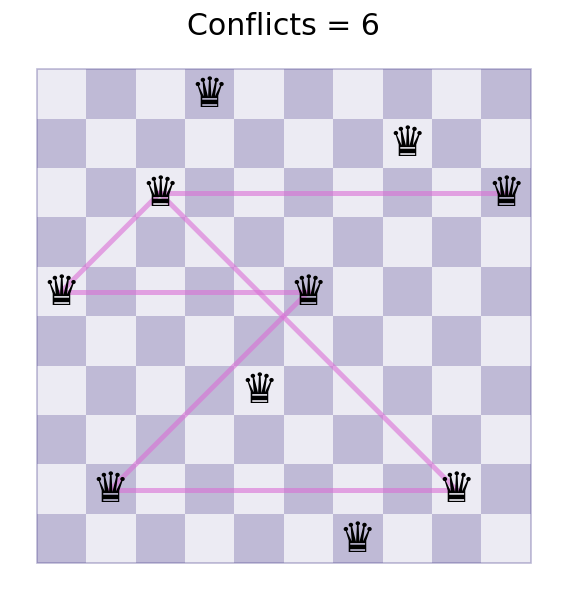

In [64]:
from matplotlib.animation import FuncAnimation
from matplotlib import animation, rc
rc('animation', html='html5')


fig = plt.figure(figsize=(6, 6), dpi=120)
ax = fig.add_subplot(1, 1, 1)


def animate(i):
    ax.clear()
    state = history[i]
    state.plot(ax, show_conflicts=True)

anim = FuncAnimation(fig, animate, frames=range(len(reduced)), interval=200, repeat=True, repeat_delay=2000)


anim.save(f'imgs/{N}-queens.gif', writer='imagemagick')

In [65]:
anim

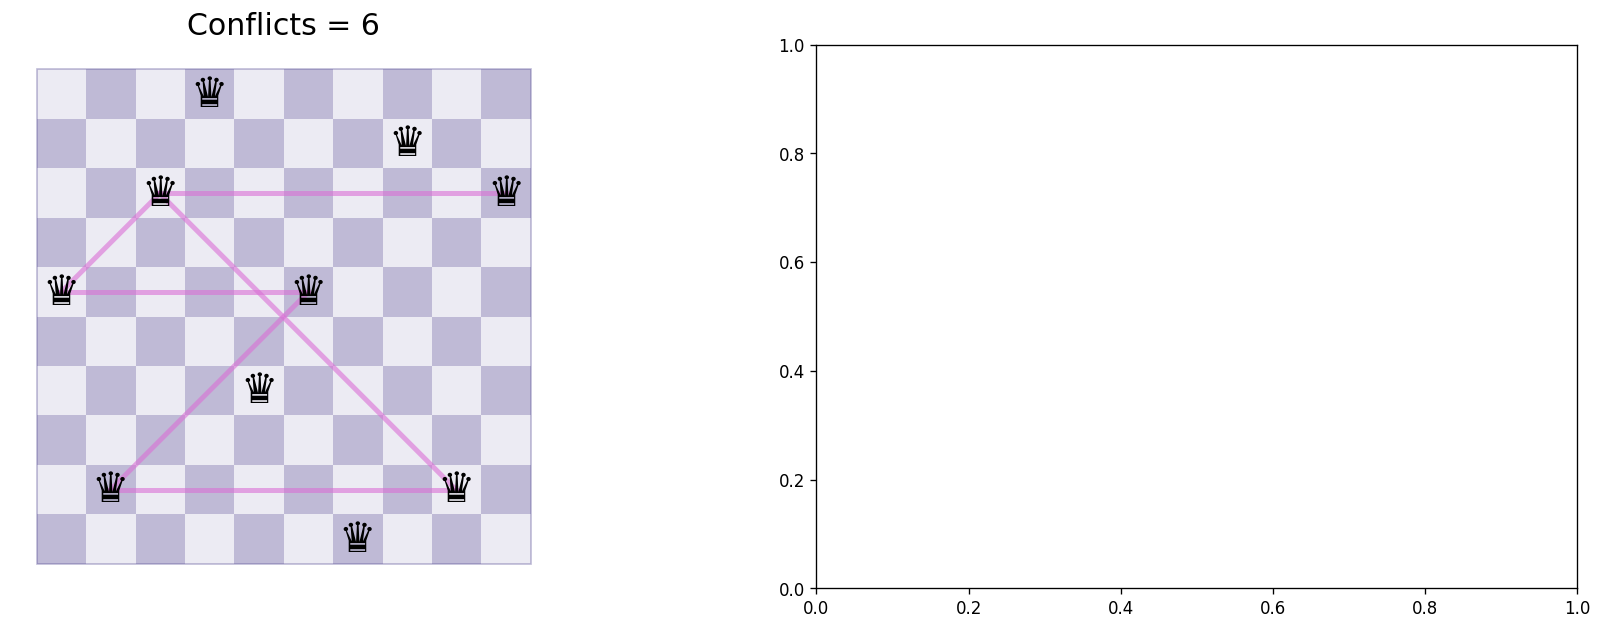

In [66]:
from matplotlib.animation import FuncAnimation
from matplotlib import animation, rc
rc('animation', html='html5')

fig = plt.figure(figsize=(18, 6), dpi=120)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)


def animate(i):
    ax1.clear()
    ax2.clear()
    state = history[i]
    state.plot(ax1, show_conflicts=True)
    
    ax2.plot([s.conflicts() for s in history[:i]])
    ax2.set_xlim(0, len(history))
    ax2.set_ylim(0, max([s.conflicts() for s in history]))
    ax2.set_xlabel('Iteration')
    ax2.set_ylabel('Conflicts')



anim = FuncAnimation(fig, animate, frames=range(len(reduced)), interval=200, repeat=True)
anim.save(f'imgs/{N}-queens.gif', writer='imagemagick')

In [ ]:
anim